The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [187]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
nobel_df = pd.read_csv('data/nobel.csv')

In [188]:
nobel_df

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN


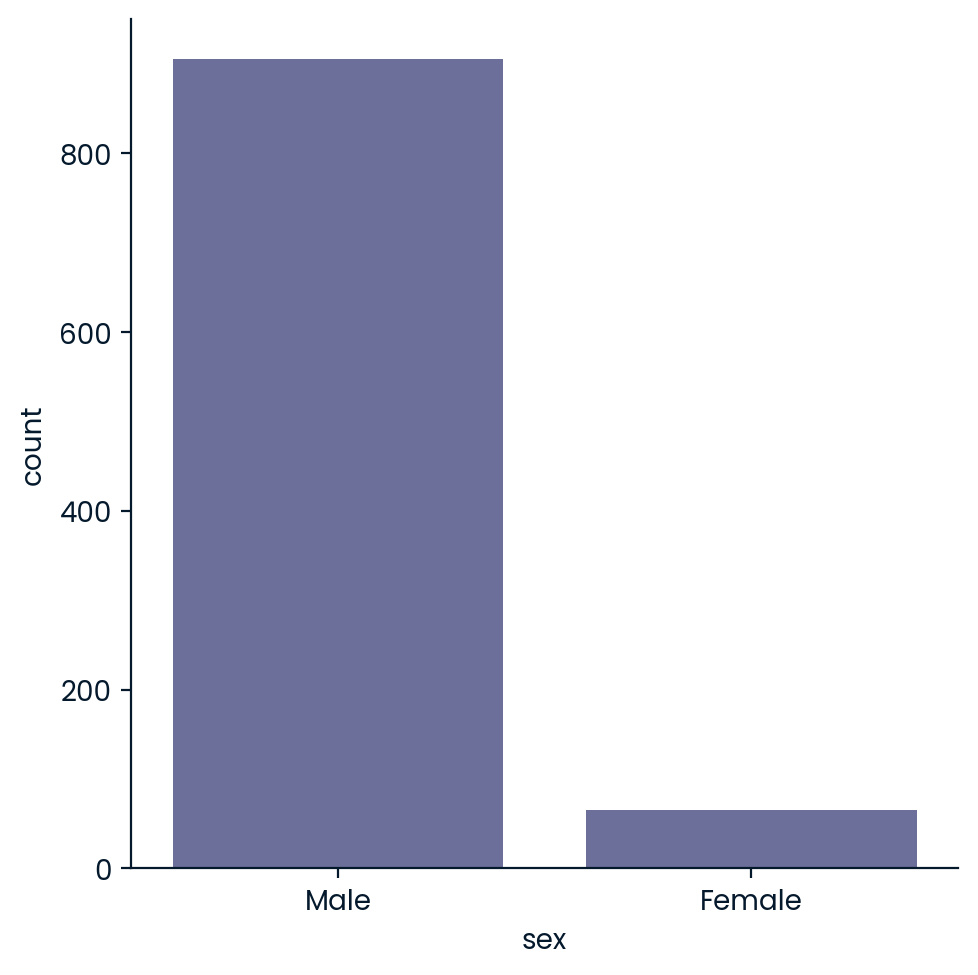

In [189]:
sns.catplot(kind='count', data=nobel_df, x='sex')
plt.show()

In [190]:
# Answer 1
top_gender = 'Male'

In [191]:
# Answer 2
top_country = nobel_df.value_counts('birth_country').idxmax()

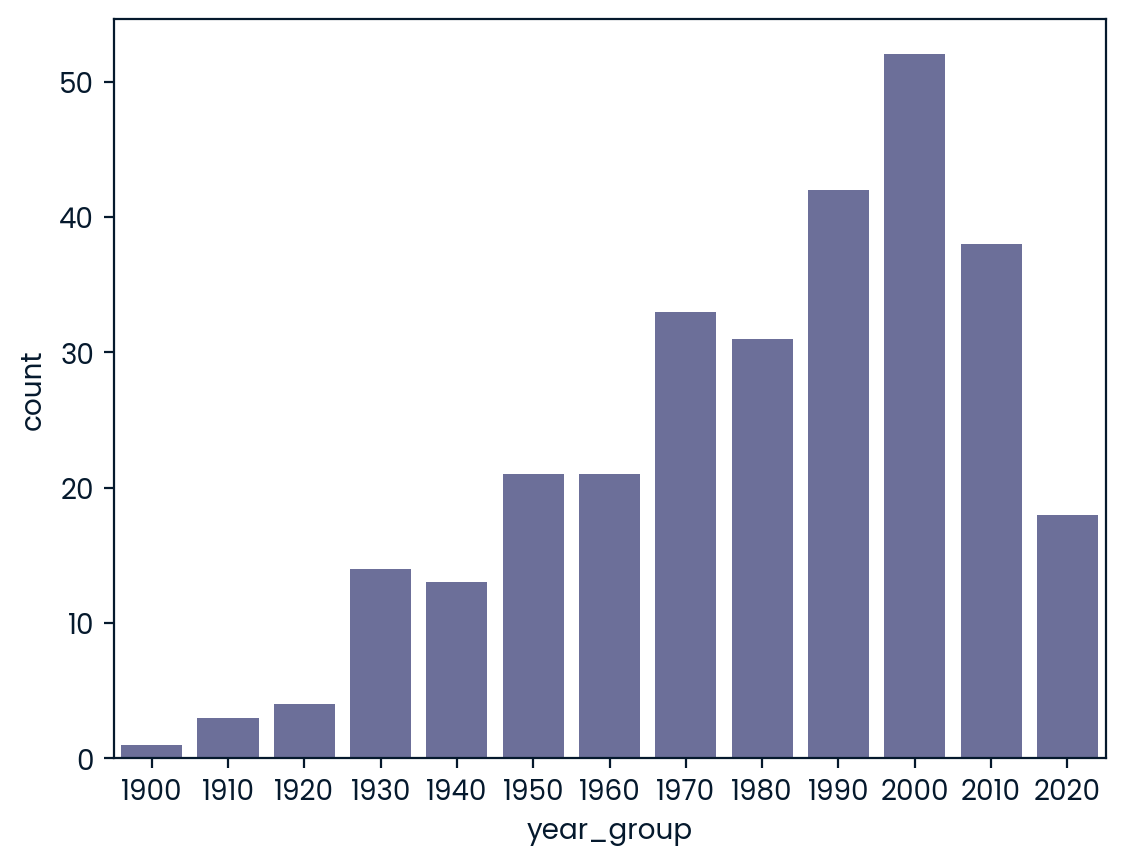

In [192]:
# nobel_df.value_counts('birth_country')
# nobel_df['nobel_by_country'] = 0
# nobel_by_country = nobel_df.groupby('birth_country').agg({'nobel_by_country': "count"})
# sns.catplot(kind="bar", data=nobel_by_country[:30], x='birth_country', y='nobel_by_country' )
# plt.xticks(rotation=90)
# sns.catplot(kind="bar", data=nobel_by_country[31:65], x='birth_country', y='nobel_by_country' )
# plt.xticks(rotation=90)
# sns.catplot(kind="bar", data=nobel_by_country[65:105], x='birth_country', y='nobel_by_country' )
# plt.xticks(rotation=90)
# sns.catplot(kind="bar", data=nobel_by_country[105:], x='birth_country', y='nobel_by_country' )
# plt.xticks(rotation=90)
# plt.show()

nobel_us_df = nobel_df[nobel_df['birth_country'] == 'United States of America']
nobel_us_df
nobel_us_df['year_group'] = nobel_us_df['year'] // 10 * 10
counts = nobel_us_df['year_group'].value_counts() / nobel_df.shape[0]

sns.countplot(data=nobel_us_df, x='year_group')
plt.show()

In [193]:
# Answer 3
max_decade_usa = 2000

In [194]:
nobel_df.sample(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
657,1995,Medicine,The Nobel Prize in Physiology or Medicine 1995,"""for their discoveries concerning the genetic ...",1/3,454,Individual,Eric F. Wieschaus,1947-06-08,"South Bend, IN",United States of America,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN
304,1957,Physics,The Nobel Prize in Physics 1957,"""for their penetrating investigation of the so...",1/2,68,Individual,Chen Ning Yang,1922-09-22,"Hofei, Anhwei",China,Male,Institute for Advanced Study,"Princeton, NJ",United States of America,NaN,NaN,NaN
418,1972,Chemistry,The Nobel Prize in Chemistry 1972,"""for their contribution to the understanding o...",1/4,243,Individual,William H. Stein,1911-06-25,"New York, NY",United States of America,Male,Rockefeller University,"New York, NY",United States of America,1980-02-02,"New York, NY",United States of America


In [195]:
nobel_female_laur = nobel_df[nobel_df['sex'] == 'Female']
nobel_female_laur.sample(2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France
932,2018,Peace,The Nobel Peace Prize 2018,"""for their efforts to end the use of sexual vi...",1/2,967,Individual,Nadia Murad,1993-00-00,Kojo,Iraq,Female,NaN,NaN,NaN,NaN,NaN,NaN


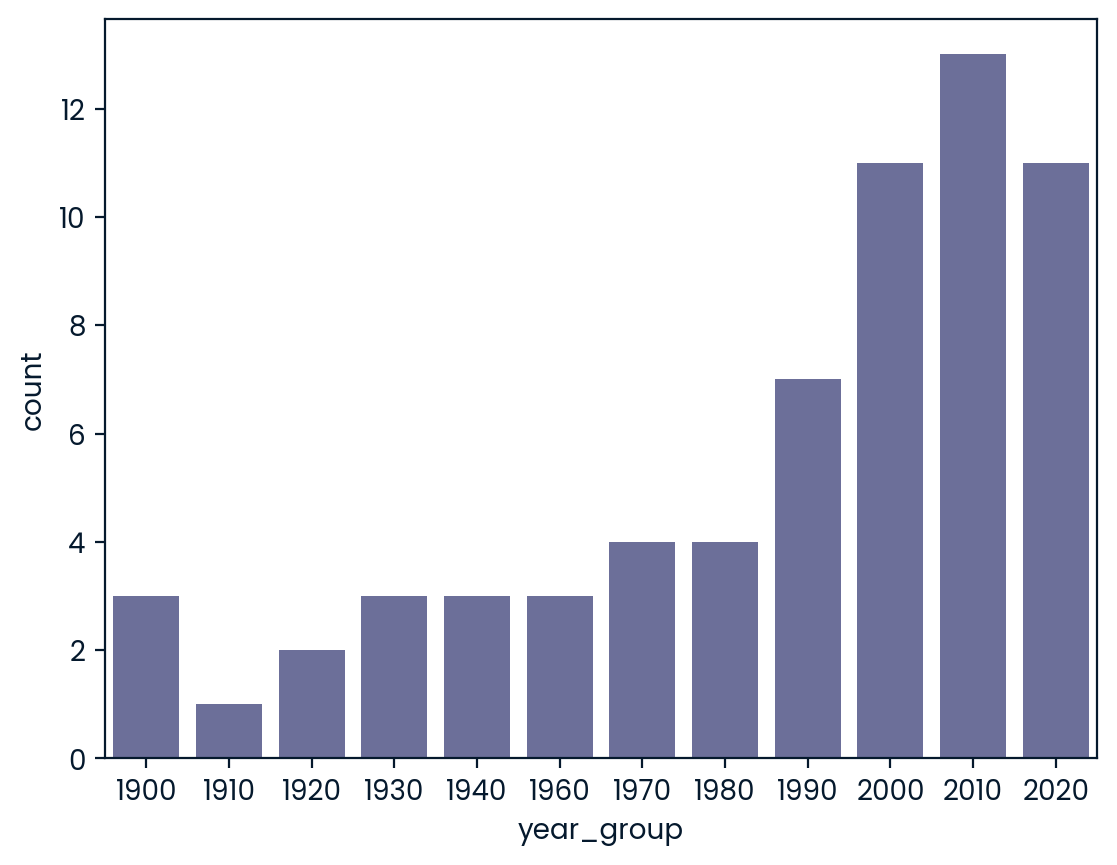

In [196]:
nobel_female_laur['year_group'] = nobel_female_laur['year'] // 10 * 10
sns.countplot(data=nobel_female_laur, x='year_group')
plt.show()

In [197]:
max_female_dict = nobel_female_laur.query('year_group == 2010')
max_female_dict = nobel_female_laur.set_index('year_group')['category'].to_dict()
# Answer 4
max_female_dict

{1900: 'Literature',
 1910: 'Chemistry',
 1920: 'Literature',
 1930: 'Literature',
 1940: 'Medicine',
 1960: 'Literature',
 1970: 'Peace',
 1980: 'Medicine',
 1990: 'Peace',
 2000: 'Medicine',
 2010: 'Economics',
 2020: 'Economics'}

In [198]:
first_woman = nobel_df.sort_values('year', ascending=True).query('sex == "Female"').head(1)
# Answer 5 & 6
# first_woman_name = str(first_woman['full_name']).split(' ', 1)[1].split(',', 1)[0]
first_woman_name = str(first_woman['full_name']).split(' ')[4]
print(first_woman_name)
first_woman_category = str(first_woman['category'])


Marie


In [199]:
nobel_df.head(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


In [200]:
nobel_df['organization_name'].isnull()
nobel_df['organization_name'].fillna(nobel_df['full_name'], inplace=True)
repeat_list = nobel_df.value_counts('organization_name').reset_index()
repeat_list.columns = ['organization_name', 'counts']

# Answer 7
repeat_list = repeat_list[repeat_list['counts'] >= 1]['organization_name'].reset_index(drop=True)
print(repeat_list)

0                               University of California
1                                     Harvard University
2                                    Stanford University
3            Massachusetts Institute of Technology (MIT)
4                                  University of Chicago
                             ...                        
581         International Centre for Theoretical Physics
582       International Campaign to Ban Landmines (ICBL)
583    International Campaign to Abolish Nuclear Weapons
584            International Atomic Energy Agency (IAEA)
585                                        Élie Ducommun
Name: organization_name, Length: 586, dtype: object
